In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
data=datasets.load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris=pd.DataFrame(data.data,columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris['Target']=pd.Categorical.from_codes(data.target,data.target_names)

In [15]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
target=LabelEncoder()

In [19]:
iris['species']=target.fit_transform(iris['Target'])

In [25]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [27]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
species              0
dtype: int64

In [28]:
iris.species.unique()

array([0, 1, 2])

In [30]:
iris.Target.unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [32]:
iris.drop('Target',axis=1,inplace=True)

In [31]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(iris.drop('species',axis=1),iris['species'],test_size=0.3,random_state=0)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random=RandomForestClassifier()

In [78]:
random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
ran_pred=random.predict(X_test)
ran_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [80]:
random_proba=random.predict_proba(X_test[10:30])

In [81]:
random_proba

array([[0.  , 0.27, 0.73],
       [0.  , 0.99, 0.01],
       [0.  , 0.97, 0.03],
       [0.  , 0.96, 0.04],
       [0.  , 0.98, 0.02],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.22, 0.78],
       [0.  , 0.98, 0.02],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.19, 0.81],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.01, 0.96, 0.03],
       [1.  , 0.  , 0.  ]])

In [82]:
m_score=random.score(X_test,y_test)

In [83]:
m_score

0.9777777777777777

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
cm=confusion_matrix(y_test,ran_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

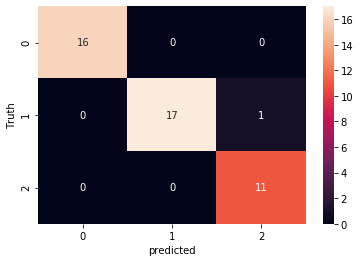

In [86]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()